                                בסייד

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import scipy.stats as st

Задание № 1

Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат

group1 - результаты для группы людей получающих препарат А.

group2 - результаты для другой группы людей, получающих препарат B.

In [ ]:
np.random.seed(11)
group1 = stats.norm.rvs(scale=30, loc=11, size=100)
group2 = group1 + stats.norm.rvs(scale=54, loc=11, size=100)


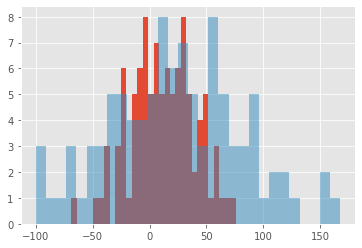

In [ ]:
plt.hist(group1, alpha = 1, bins=30);
plt.hist(group2, alpha = 0.5, bins=30);

распределение нормальное , используем тест Стьюдента

In [ ]:
stats.ttest_ind(group1, group2, equal_var = False)

Ttest_indResult(statistic=-1.7338006472109972, pvalue=0.08511123469659897)

Вывод: pvalue больше 5 процентов , значит не отвергаем нулевую гипотезу . Средние скорее всего не отличаются

Задание № 2

 Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.
Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

df = pd.DataFrame(list(zip(water, nutri, mineral)), columns = ['water', 'nutri','mineral'])


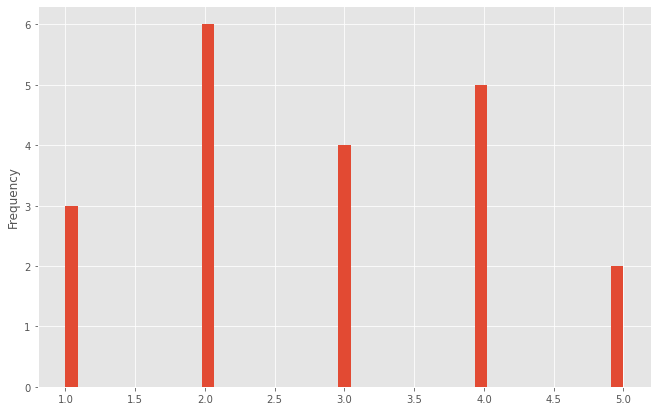

In [ ]:
df['water'].plot(kind='hist', bins=45)


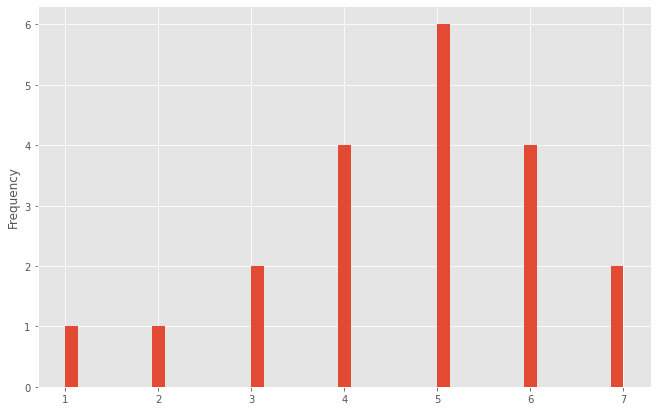

In [ ]:
df['nutri'].plot(kind='hist', bins=45)

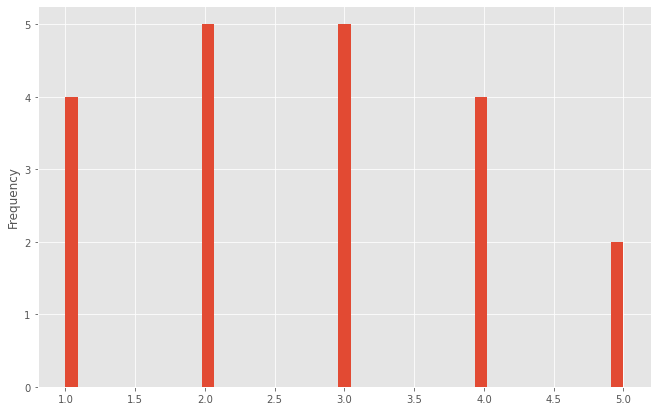

In [ ]:
df['mineral'].plot(kind='hist', bins=45)


распределение не нормальное и количество сравниваемых 3 будем использовать Критерий Вилкоксона и Манна-Уитни

Нулевая гипотеза: water=nutri=mineral
Альтернативная гипотеза: !(water=nutri=mineral)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 11.974276527331194


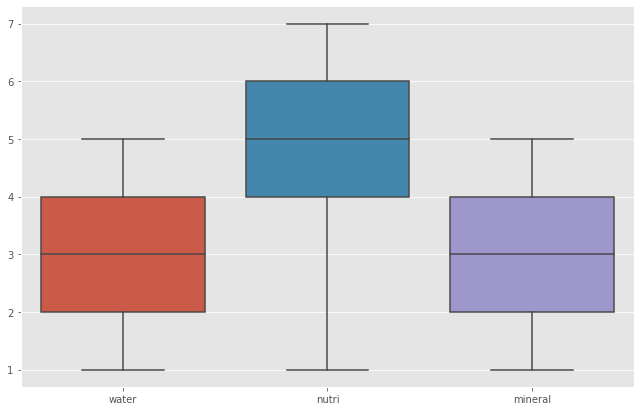

In [ ]:
sns.boxplot(data=df);
print('Нулевая гипотеза:', '='.join(df))
print('Альтернативная гипотеза:', f'!({"=".join(df)})')
# общая средняя
grand_mean = df.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in df.values.flatten())
# отклонение групповых средний от общей средней
ssb = sum(df[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in df.mean().items())
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in df[group]) for group, group_mean in df.mean().items())

groups = df.shape[1]
# Степени свободы
dfb = groups - 1
dfw = df.size - groups
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")

Вывод : Распределение результатов отличается о чем говорит f-значение.
А по бокс-плоту можно сделать вывод что эффект от удобрения есть 

Задание 3

роанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения.

Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему?

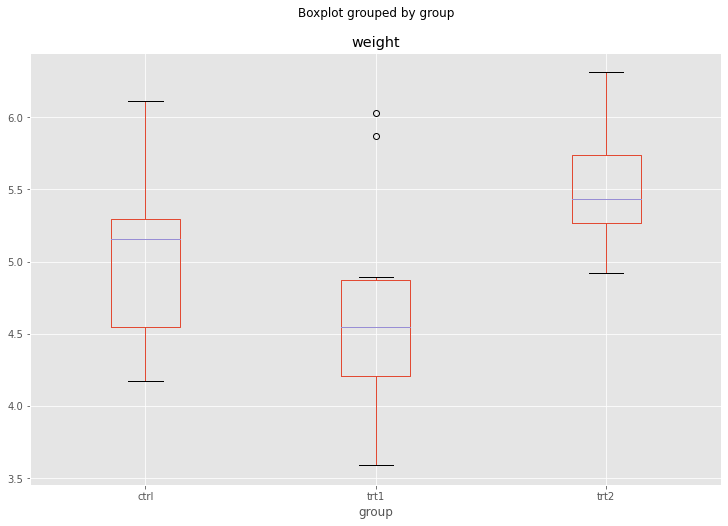

In [ ]:
my_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/A-B_testing/PlantGrowth.csv')
my_data.boxplot('weight', by='group', figsize=(12, 8));

Предположим что группа "ctrl" это контрольная группа , и тогда можно сравнить попарно каждую из остальных групп с контрольной t-test -ом.

In [ ]:
stats.ttest_ind(my_data.loc[my_data['group'] == 'ctrl']['weight'], my_data.loc[my_data['group'] == 'trt2']['weight'], equal_var = False)

Ttest_indResult(statistic=-2.1340204531240654, pvalue=0.047899255601968956)

pvalue меньше 5% значит эффект от этого удобрения не значительный 

In [ ]:
stats.ttest_ind(my_data.loc[my_data['group'] == 'ctrl']['weight'], my_data.loc[my_data['group'] == 'trt1']['weight'], equal_var = False)


Ttest_indResult(statistic=1.191260381848701, pvalue=0.25038250858754874)

pvalue большое , но мы видим по боксплоту что среднее значение в группе значительно меньше чем в контрольной группе. Значит это удобрение также не следует использовать .
Вывод : Оба удобрения не подходят

Задание 4

In [2]:
pokemon_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/A-B_testing/pokemon.csv')

# pid: Numeric - ID покемона
# HP: Numeric - Очки здоровья
# Attack: Numeric - Сила обычной атаки
# Defense: Numeric - Сила обычной защиты
# Sp. Atk: Numeric - Сила специальной атаки
# Sp. Def: Numeric - Сила специальной защиты
# Speed: Numeric - Скорость движений
# Legendary: Boolean - «True», если покемон редкий
# Class 1: Categorical - Класс покемона
# Class 2: Categorical - Класс покемона


Задание № 1:

Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;

Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов

In [5]:
grass = pokemon_data.loc[pokemon_data['Class 1'] == 'Grass' ]
rock = pokemon_data.loc[pokemon_data['Class 1'] == 'Rock' ]


In [11]:
# Тест Стьюдента

st.ttest_ind(grass['Attack'], rock['Attack'], equal_var=False)

Ttest_indResult(statistic=-3.20601097459528, pvalue=0.002020656493869084)

Вывод:Отклоняем нулевую гипотезу, средние,отличаются

Задание № 2:
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal.

Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны относятся к обоим классам, выбросьте их;

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [16]:
water = pokemon_data.loc[pokemon_data['Class 1'] == 'Water' ]
normal = pokemon_data.loc[pokemon_data['Class 1'] == 'Normal' ]


In [17]:
# Тест Стьюдента

st.ttest_ind(water['Speed'], normal['Speed'], equal_var=False)


Ttest_indResult(statistic=-1.5515751280920234, pvalue=0.12245787138204893)

Вывод: pvalue больше 5%, значит не отклоняем нулевую гипотезу , и средние скорее всего одинаковые . Следовательно покемоны в классе Water в среднем не быстрее, чем покемоны в классе Normal.

Задание № 4:
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [18]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']
mega_pokemon = pd.DataFrame()

for i in treathed_pokemon:
  mega_pokemon = mega_pokemon.append(pokemon_data.loc[pokemon_data['Name'] == i ], ignore_index = True )
  pokemon_data.drop(pokemon_data[pokemon_data['Name'] == i].index, inplace=True)
         

In [19]:
# Тест Стьюдента

st.ttest_ind(mega_pokemon["Attack"], pokemon_data["Attack"], equal_var=False)


Ttest_indResult(statistic=1.7731893058537767, pvalue=0.17389310089863677)

Вывод : pvalue больше 5 % , Мы не можем отвергнуть нулевую гипотезу , значит сыворотка не работает

Задание № 5:
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [29]:
pokemon_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/A-B_testing/pokemon.csv')

pokemon_data['sum_features'] = pokemon_data['HP']+pokemon_data['Attack']+pokemon_data['Defense']
pokemon_data['sum_multiplication'] = pokemon_data['HP']*pokemon_data['Attack']*pokemon_data['Defense']

legendary = pokemon_data.loc[pokemon_data['Legendary'] == True ]
no_legendary = pokemon_data.loc[pokemon_data['Legendary'] == False ]

stat1, pvalue1 = st.ttest_ind(legendary["sum_features"], no_legendary["sum_features"], equal_var=False)
stat2, pvalue2 = st.ttest_ind(legendary["sum_multiplication"], no_legendary["sum_multiplication"], equal_var=False)
print(f'pvalue суммы характеристик : {pvalue1}')
print(f'pvalue произведений характеристик : {pvalue2}')


pvalue суммы характеристик : 2.9282718703329855e-26
pvalue произведений характеристик : 2.895038880907388e-15


Вывод: pvalue стремится к нулю , значит отвергаем нулевую гипотезу . Сумма и произведение характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов

Вывод: действительно произведение характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов

Задание № 6:
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса best_defence_class, которые на его взгляд одинаковы по "силе обычной защиты" Defense. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [33]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']

rock = pokemon_data.loc[pokemon_data['Class 1'] == 'Rock' ]['Defense']
ground = pokemon_data.loc[pokemon_data['Class 1'] == 'Ground' ]['Defense']
steel = pokemon_data.loc[pokemon_data['Class 1'] == 'Steel' ]['Defense']
ice = pokemon_data.loc[pokemon_data['Class 1'] == 'Ice' ]['Defense']

st.f_oneway(rock, ground, steel, ice)

F_onewayResult(statistic=10.576882027817977, pvalue=3.0803014649204294e-06)

pvalue стремится к нулю , значит отвергаем нулевую гипотезу эти классы покемонов отличаются по уровню защиты статистически значимо